In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow matplotlib
!pip install numpy
!pip install gunicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.3 MB/s eta 0:00:00


Found 407 images belonging to 3 classes.
Found 407 images belonging to 3 classes.
Epoch 1/10
12/12 [==============================] - 305s 26s/step - loss: -98.7421 - accuracy: 0.2453 - val_loss: -547.0673 - val_accuracy: 0.2318
Epoch 2/10
12/12 [==============================] - 228s 20s/step - loss: -3241.9551 - accuracy: 0.2480 - val_loss: -10751.0889 - val_accuracy: 0.2396
Epoch 3/10
12/12 [==============================] - 167s 14s/step - loss: -34295.2539 - accuracy: 0.2370 - val_loss: -85655.4922 - val_accuracy: 0.2370
Epoch 4/10
12/12 [==============================] - 163s 14s/step - loss: -212806.1406 - accuracy: 0.2427 - val_loss: -446139.7188 - val_accuracy: 0.2370
Epoch 5/10
12/12 [==============================] - 168s 15s/step - loss: -841285.1250 - accuracy: 0.2293 - val_loss: -1691402.6250 - val_accuracy: 0.2396
Epoch 6/10
12/12 [==============================] - 159s 14s/step - loss: -2809790.7500 - accuracy: 0.2427 - val_loss: -5767415.5000 - val_accuracy: 0.2370
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


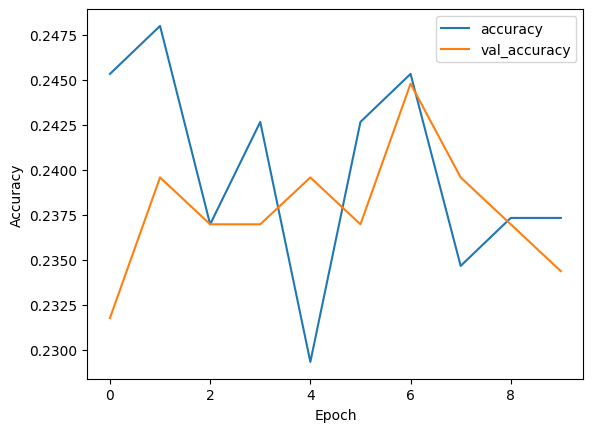

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load your wheat leaf dataset and preprocess it as needed
# For simplicity, let's assume you have a directory structure like this:
# /dataset
#     /train
#         /healthy
#         /diseased
#     /test
#         /healthy
#         /diseased

train_dir = "/content/drive/MyDrive/wheat_leaf"
test_dir = "/content/drive/MyDrive/wheat_leaf"

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Check if the model file exists
try:
    # Load the saved model
    model = load_model('wheat_leaf_classifier.h5')
    print("Pre-trained model loaded successfully!")
except:
    # Define the CNN model architecture
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=10,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Save the model
    model.save('/content/drive/MyDrive/ML Model/wheat_leaf_classifier.h5')
    print("Model trained and saved successfully!")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FileUpload, Button, VBox, HBox, Output
from PIL import Image
import io  # Import the io module

# Load the model
model = load_model('/content/drive/MyDrive/ML Model/wheat_leaf_classifier.h5')

# Define a function to classify uploaded images
def classify_image(change):
    with output:
        output.clear_output()
        for filename in upload.value.keys():
            img = Image.open(io.BytesIO(upload.value[filename]['content'])).convert("RGB")
            img = img.resize((img_width, img_height))
            img_array = np.array(img) / 255.0  # Normalize pixel values
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            prediction = model.predict(img_array)
            plt.imshow(img)
            plt.axis('off')
            plt.title('Prediction: Diseased' if prediction < 0.5 else 'Prediction: Healthy')
            plt.show()

# Define a function to handle upload and submit button click
def handle_submit_button_click(b):
    classify_image(None)

# Create upload button
upload = FileUpload(accept='image/*', multiple=True)

# Create submit button
submit_button = Button(description="Upload and Submit")
submit_button.on_click(handle_submit_button_click)

# Create output widget
output = Output()

# Arrange widgets
vbox = VBox([upload, submit_button, output])

# Display the widgets
display(vbox)


NameError: name 'load_model' is not defined